<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/Auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

In [9]:
(x_train, y_tr), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

In [10]:
autoencoder = Sequential()
autoencoder.add(Dense(512, activation="elu", input_shape=(784,)))
autoencoder.add(Dense(128, activation="elu"))
autoencoder.add(Dense(10, activation="linear",name="latinVector")) #total 10 classes
autoencoder.add(Dense(128, activation="elu"))
autoencoder.add(Dense(512, activation="elu"))
autoencoder.add(Dense(784, activation="sigmoid"))

autoencoder.compile(loss='mean_squared_error', optimizer=Adam())

In [11]:
model = autoencoder.fit(x_train,x_train, batch_size=1024, epochs=10, verbose=1,
                        validation_data=(val_x, val_x))

Epoch 1/10
59/59 [==============================] - 2s 17ms/step - loss: 0.0742 - val_loss: 0.0484
Epoch 2/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0418 - val_loss: 0.0365
Epoch 3/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0340 - val_loss: 0.0302
Epoch 4/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0287 - val_loss: 0.0263
Epoch 5/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0256 - val_loss: 0.0240
Epoch 6/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0237 - val_loss: 0.0225
Epoch 7/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0223 - val_loss: 0.0214
Epoch 8/10
59/59 [==============================] - 1s 14ms/step - loss: 0.0213 - val_loss: 0.0205
Epoch 9/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0205 - val_loss: 0.0198
Epoch 10/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0198 - val_loss: 0.0191


In [12]:
encoder = Model(autoencoder.input, autoencoder.get_layer('latinVector').output)
encoded_data = encoder.predict(x_train)
encoding_dim = 10
encoded_data[0]

array([ -6.724723 ,  30.402382 ,   8.195906 ,  13.920865 ,  -1.4524078,
        -9.954253 ,  38.37574  ,  -9.831039 ,  10.839326 , -24.807693 ],
      dtype=float32)

In [13]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
# Return Decoder 
encode_input = Input(shape=(encoding_dim,))

decoder = autoencoder.layers[-3](encode_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)

decoder = Model(encode_input,decoder)

In [15]:
%matplotlib inline
from keras.preprocessing import image

img = image.load_img('/content/cat.jpg', target_size=(28,28), color_mode='grayscale')
input_img = image.img_to_array(img)
print(input_img.shape)
inputs = input_img.reshape(1,784) / 255

target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

(28, 28, 1)
[21.070824]


In [16]:
%matplotlib inline
from keras.preprocessing import image

img = image.load_img('/content/5.png', target_size=(28,28), color_mode='grayscale')
input_img = image.img_to_array(img)
print(input_img.shape)
inputs = input_img.reshape(1,784) / 255

target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

(28, 28, 1)
[21.367912]


In [17]:
inputs = x_train[0].reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[5.3244808]


In [19]:
# Denoising Autoencoder
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import optimizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [20]:
(x_train, y_tr), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28,28,1) / 255
val_x = x_test.reshape(10000, 28,28,1) / 255

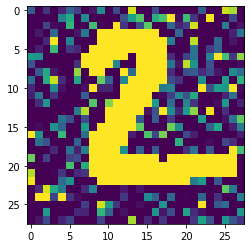

In [27]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.,1)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.imshow(x_test_noisy[1].reshape(28,28))


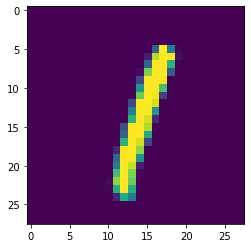

In [47]:
plt.imshow(x_test[5].reshape(28,28))

In [30]:
input_img = Input(shape=(28,28,1))
nn = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2,2), padding='same')(nn)
nn = Conv2D(32, (3,3), activation='relu', padding='same')(nn)

encoded = MaxPooling2D((2,2), padding='same')(nn) 

In [31]:
nn = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2,2))(nn)
nn = Conv2D(32, (3,3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2,2))(nn)

decoded = Conv2D(1, (3,3), padding='same', activation='sigmoid')(nn)

In [33]:
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=265, validation_data=(x_test_noisy, x_test))

Epoch 1/50
227/227 [==============================] - 8s 33ms/step - loss: 0.6765 - val_loss: 5.7222
Epoch 2/50
227/227 [==============================] - 7s 31ms/step - loss: 0.6651 - val_loss: 8.4056
Epoch 3/50
227/227 [==============================] - 7s 31ms/step - loss: 0.6502 - val_loss: 12.4495
Epoch 4/50
227/227 [==============================] - 7s 31ms/step - loss: 0.6272 - val_loss: 18.9790
Epoch 5/50
227/227 [==============================] - 7s 31ms/step - loss: 0.5948 - val_loss: 29.4856
Epoch 6/50
227/227 [==============================] - 7s 31ms/step - loss: 0.5584 - val_loss: 43.8588
Epoch 7/50
227/227 [==============================] - 7s 32ms/step - loss: 0.5316 - val_loss: 56.8791
Epoch 8/50
227/227 [==============================] - 7s 31ms/step - loss: 0.5190 - val_loss: 64.4167
Epoch 9/50
227/227 [==============================] - 7s 31ms/step - loss: 0.5130 - val_loss: 67.3895
Epoch 10/50
227/227 [==============================] - 7s 31ms/step - loss: 0.5085 -

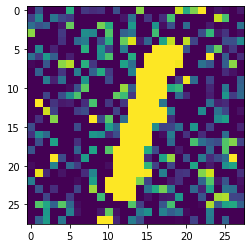

In [35]:
plt.imshow(x_test_noisy[5].reshape(28,28))

In [61]:
result = autoencoder.predict(x_test[5].reshape(1,28,28,1))

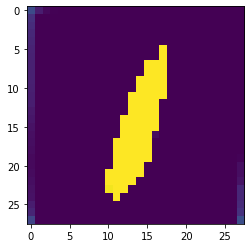

In [62]:
plt.imshow(result.reshape(28,28))

(1, 28, 3)
